The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



**Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.**



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

**Load data and libraries**

In [1]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


#Load data
df = pd.read_csv('/content/gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
df.shape

(15039, 11)

In [ ]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


**EDA & Feature Engineering**

In [ ]:
#check for misssing values
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
df.isna().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

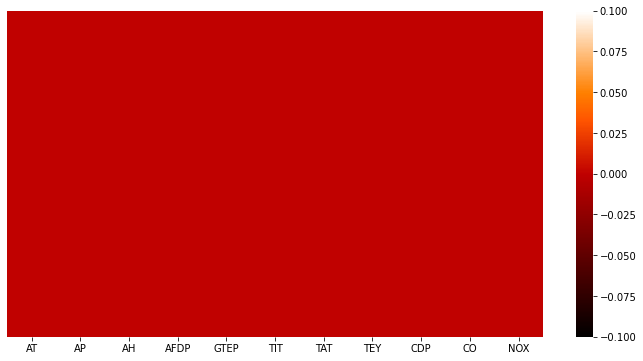

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isna(), cmap =('gist_heat'), yticklabels=False)

In [ ]:
#check for duplicate values
df[df.duplicated()].shape

(0, 11)

In [ ]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [ ]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [ ]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

Observation:
- No missing values
- No duplicate values
- All dtypes are correct.

**Data Visualisation**

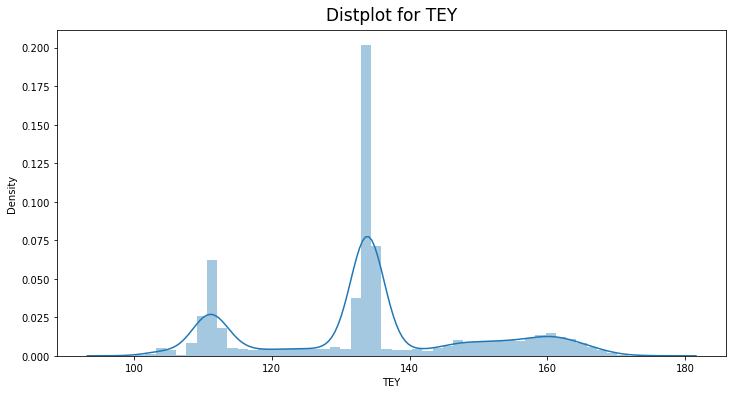

In [ ]:
#Target variable
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(df['TEY'])

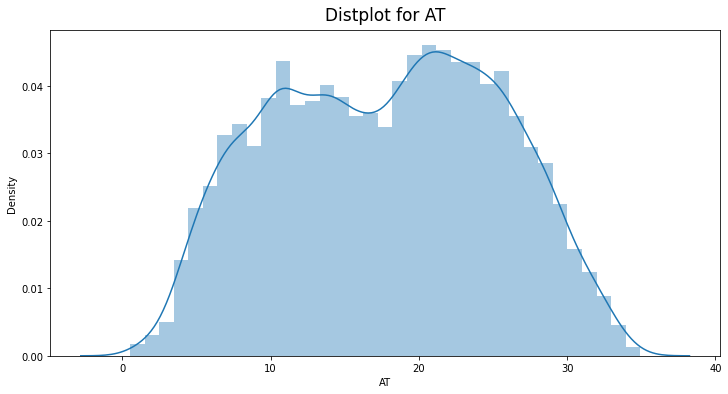

In [ ]:
plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(df['AT'])

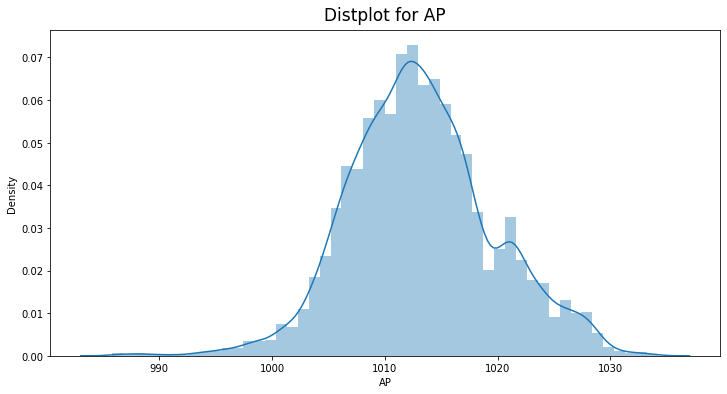

In [ ]:
plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(df['AP'])

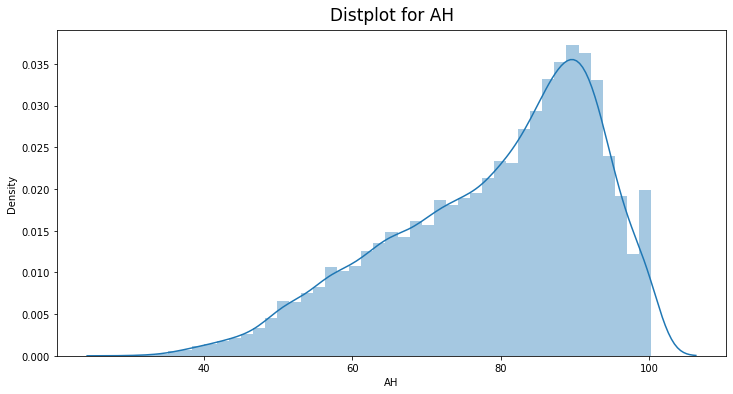

In [ ]:
plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(df['AH'])

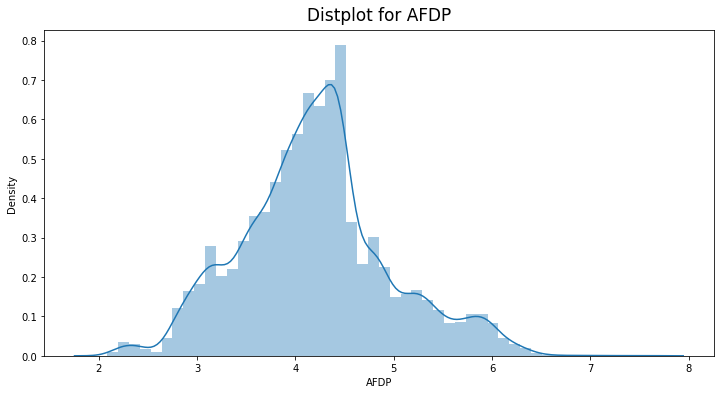

In [ ]:
plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(df['AFDP'])

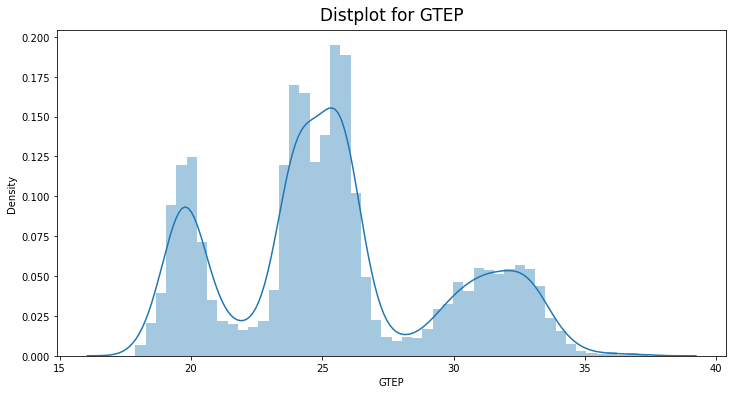

In [ ]:
plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(df['GTEP'])

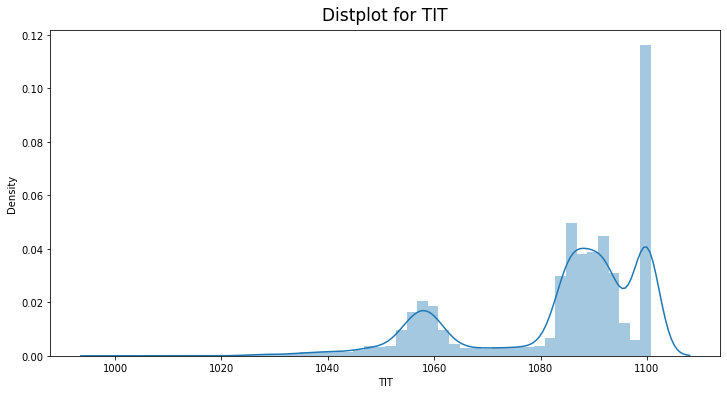

In [ ]:
plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(df['TIT'])

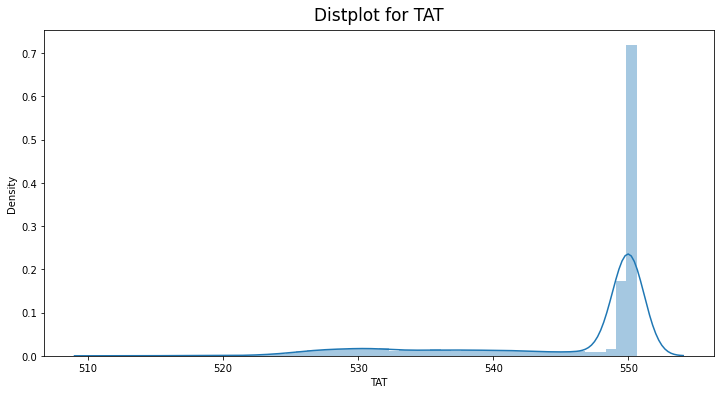

In [ ]:
plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(df['TAT'])

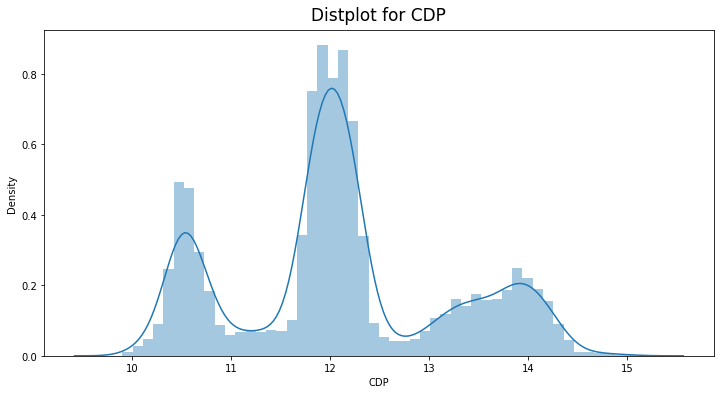

In [ ]:
plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(df['CDP'])

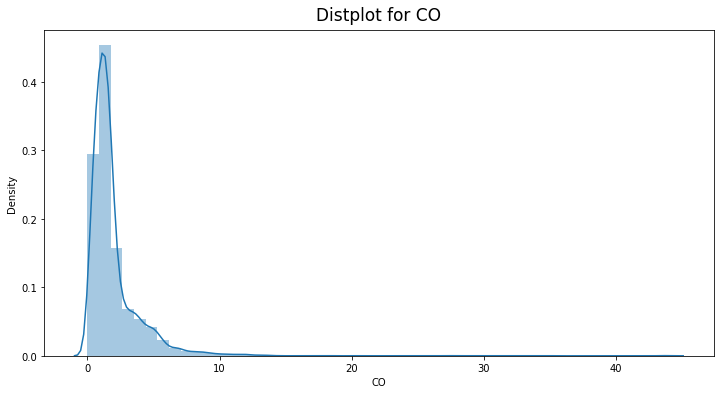

In [ ]:
plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(df['CO'])

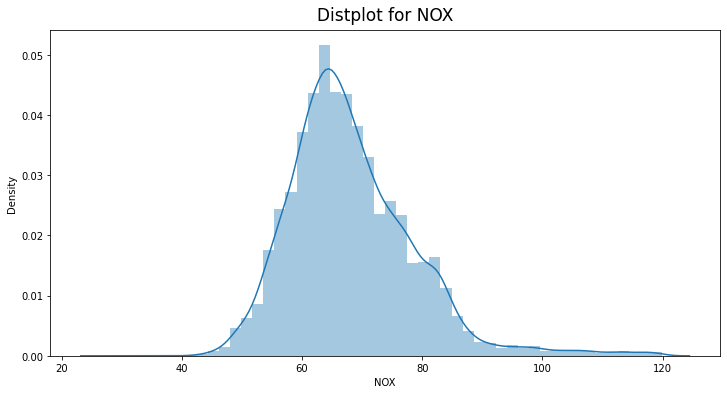

In [ ]:
plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(df['NOX'])

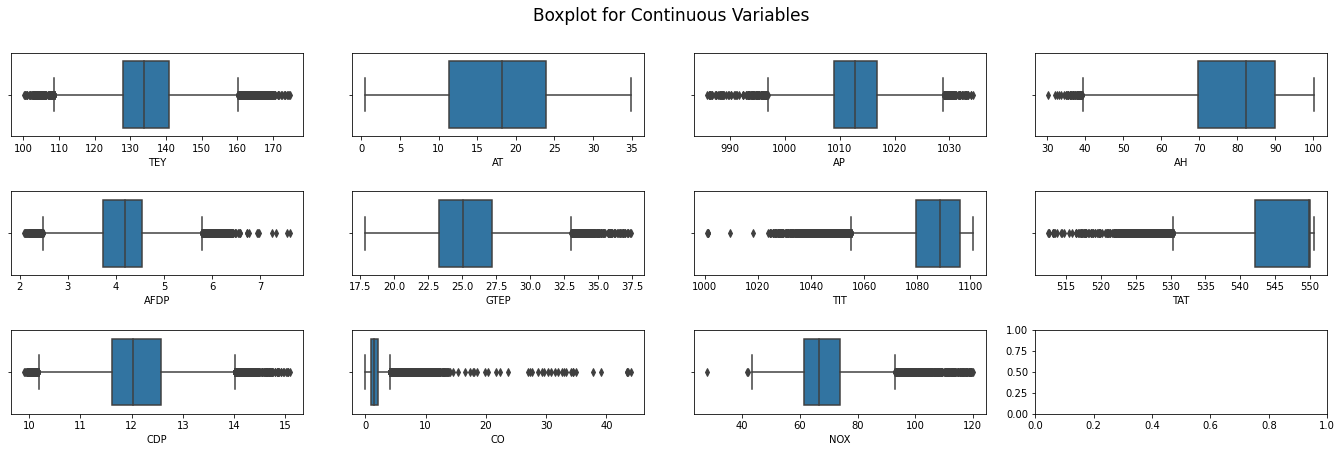

In [ ]:
#check for outliers
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

- We have a noisy data.

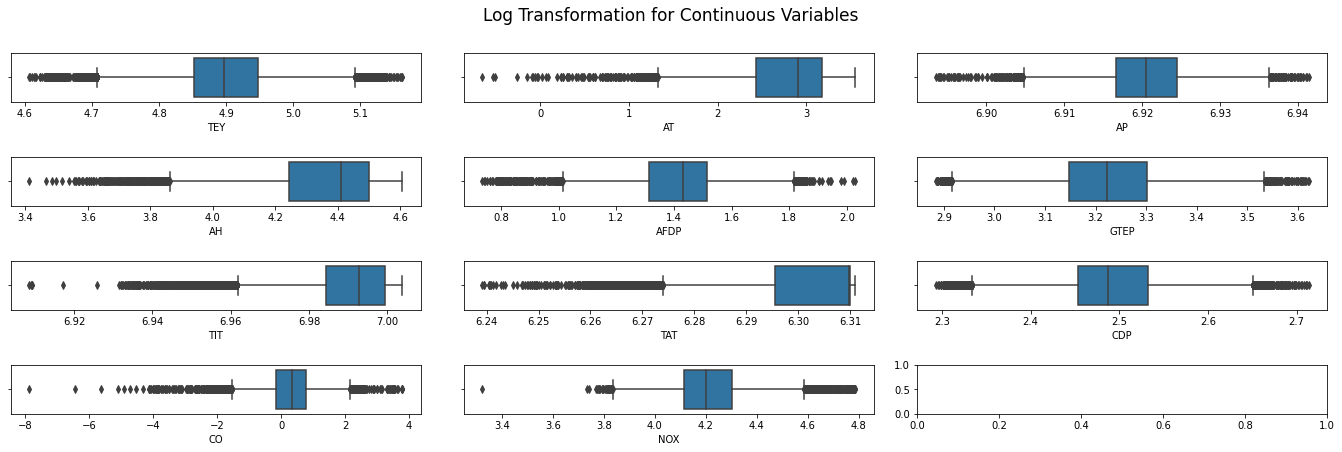

In [ ]:
import numpy as np
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.TEY), ax=ax[0,0])
sns.boxplot(np.log(df.AT), ax=ax[0,1])
sns.boxplot(np.log(df.AP), ax=ax[0,2])
sns.boxplot(np.log(df.AH), ax=ax[1,0])
sns.boxplot(np.log(df.AFDP), ax=ax[1,1])
sns.boxplot(np.log(df.GTEP), ax=ax[1,2])
sns.boxplot(np.log(df.TIT), ax=ax[2,0])
sns.boxplot(np.log(df.TAT), ax=ax[2,1])
sns.boxplot(np.log(df.CDP), ax=ax[2,2])
sns.boxplot(np.log(df.CO), ax=ax[3,0])
sns.boxplot(np.log(df.NOX), ax=ax[3,1])
plt.suptitle("Log Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

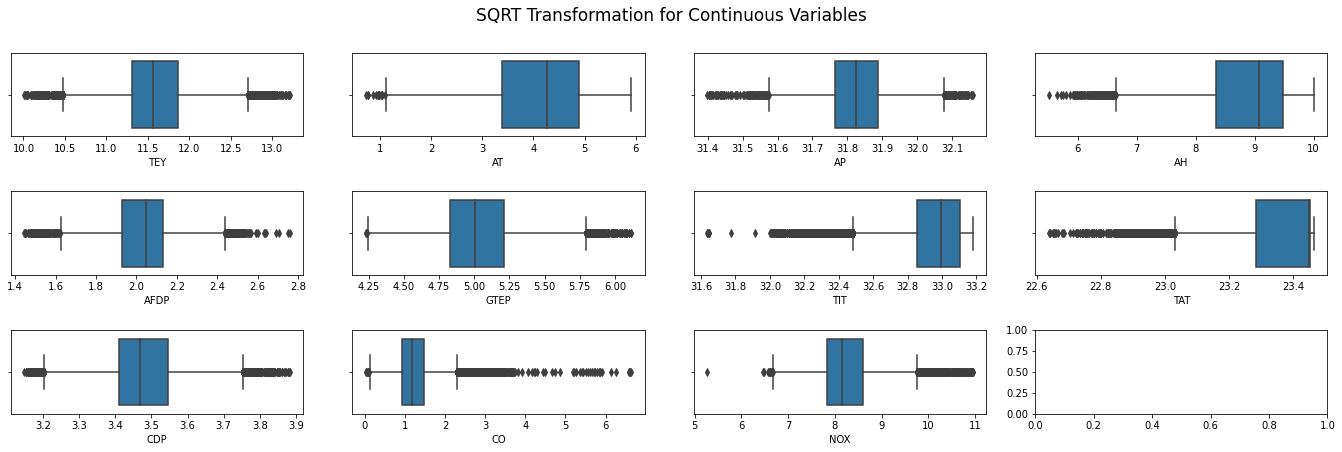

In [ ]:
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.sqrt(df.AT), ax=ax[0,1])
sns.boxplot(np.sqrt(df.AP), ax=ax[0,2])
sns.boxplot(np.sqrt(df.AH), ax=ax[0,3])
sns.boxplot(np.sqrt(df.AFDP), ax=ax[1,0])
sns.boxplot(np.sqrt(df.GTEP), ax=ax[1,1])
sns.boxplot(np.sqrt(df.TIT), ax=ax[1,2])
sns.boxplot(np.sqrt(df.TAT), ax=ax[1,3])
sns.boxplot(np.sqrt(df.CDP), ax=ax[2,0])
sns.boxplot(np.sqrt(df.CO), ax=ax[2,1])
sns.boxplot(np.sqrt(df.NOX), ax=ax[2,2])
plt.suptitle("SQRT Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

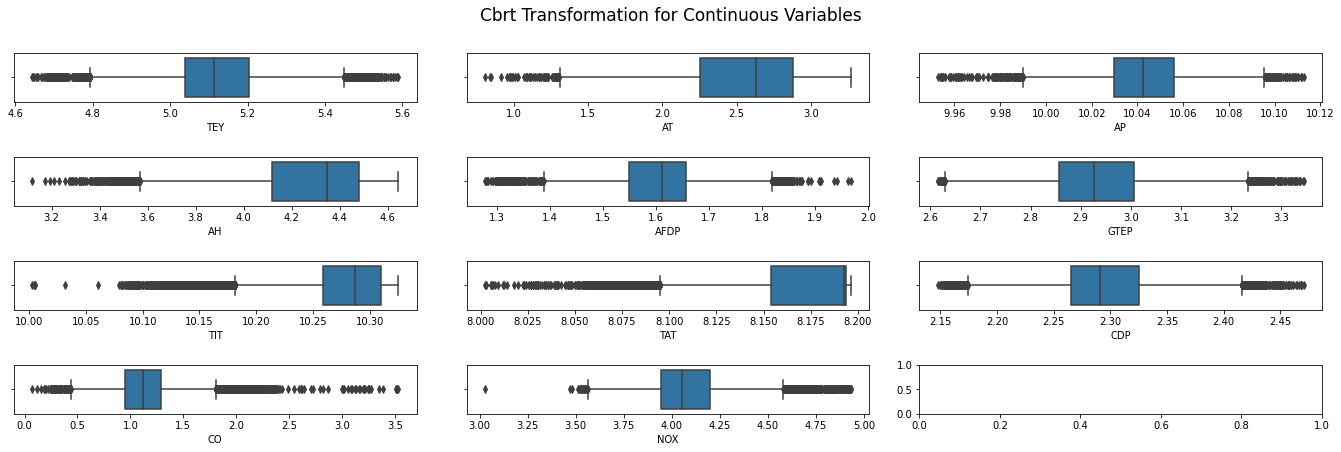

In [ ]:
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.cbrt(df.AT), ax=ax[0,1])
sns.boxplot(np.cbrt(df.AP), ax=ax[0,2])
sns.boxplot(np.cbrt(df.AH), ax=ax[1,0])
sns.boxplot(np.cbrt(df.AFDP), ax=ax[1,1])
sns.boxplot(np.cbrt(df.GTEP), ax=ax[1,2])
sns.boxplot(np.cbrt(df.TIT), ax=ax[2,0])
sns.boxplot(np.cbrt(df.TAT), ax=ax[2,1])
sns.boxplot(np.cbrt(df.CDP), ax=ax[2,2])
sns.boxplot(np.cbrt(df.CO), ax=ax[3,0])
sns.boxplot(np.cbrt(df.NOX), ax=ax[3,1])
plt.suptitle("Cbrt Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

- None of the transformations are helpful to treat the outliers.

**Dependency of Target variable on diff Features**

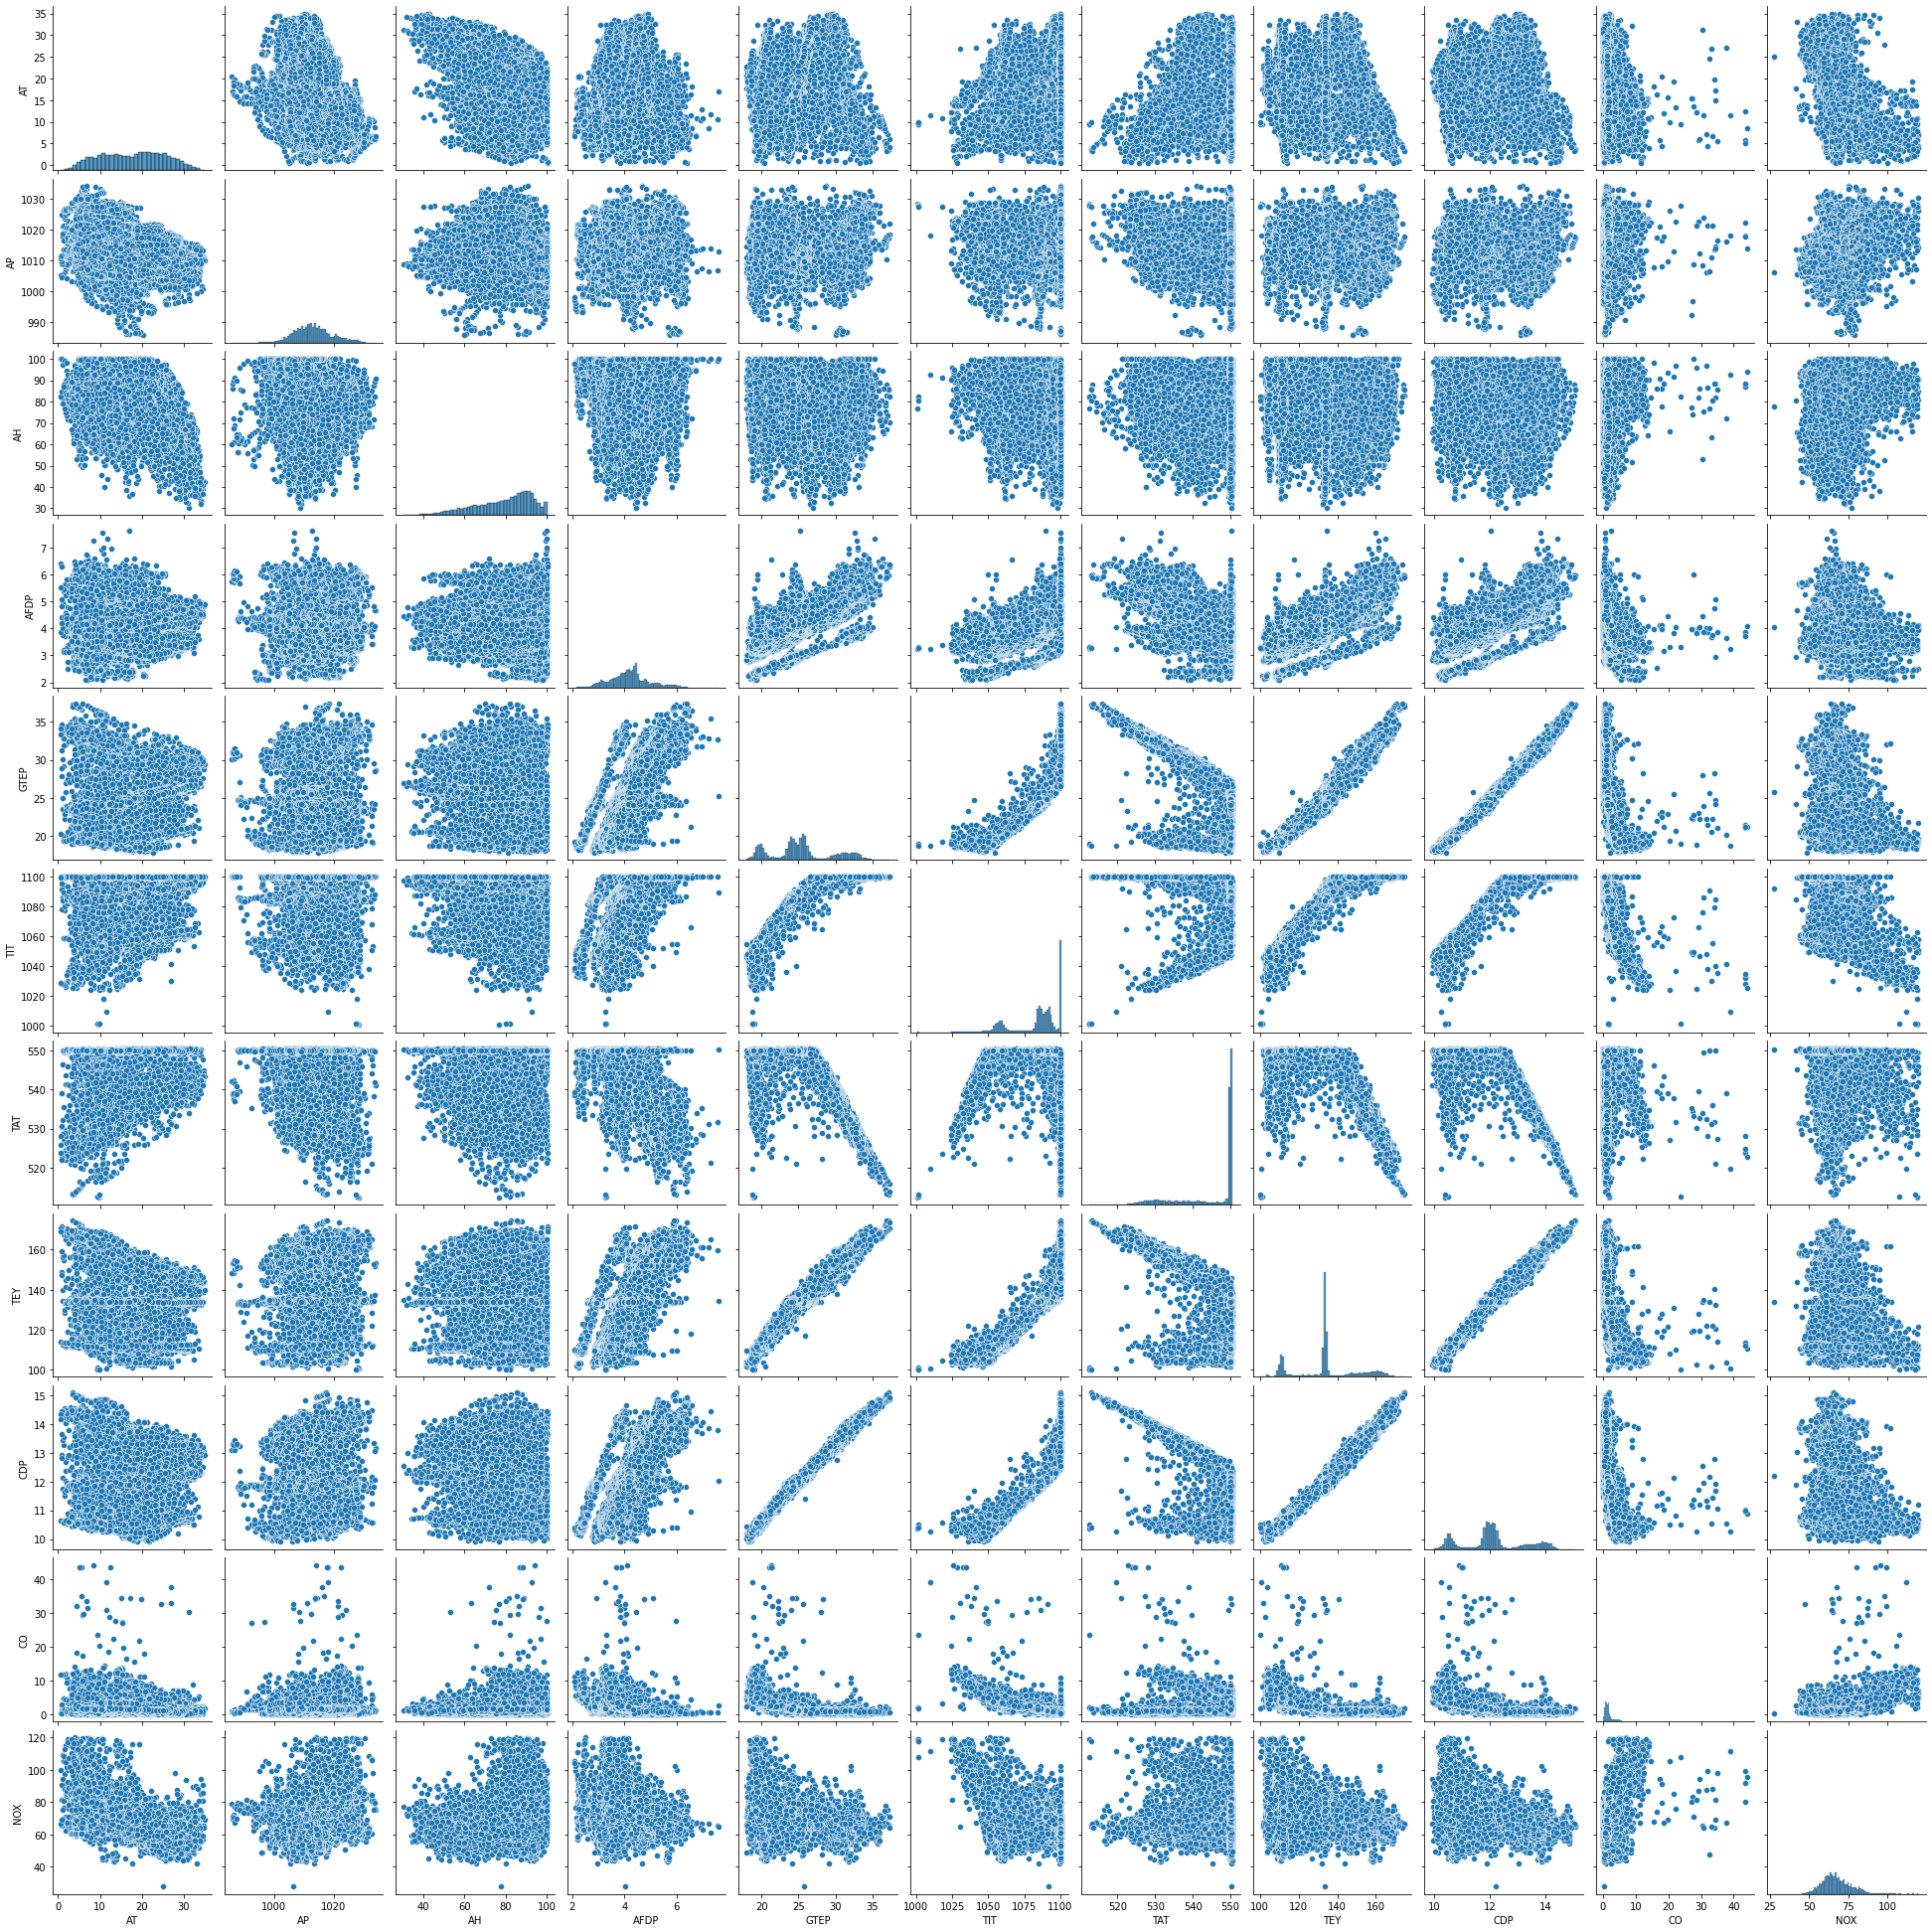

In [ ]:
sns.pairplot(df)

In [ ]:
corr = pd.DataFrame(data = df.corr().iloc[:,7], index=df.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


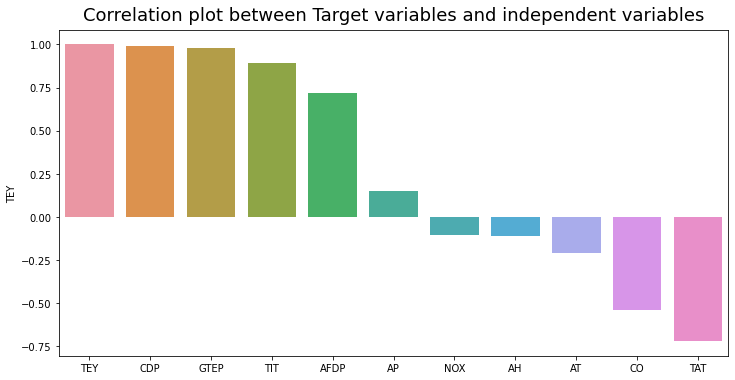

In [ ]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

Text(0.5, 1.0, 'Correlation Map of variables')

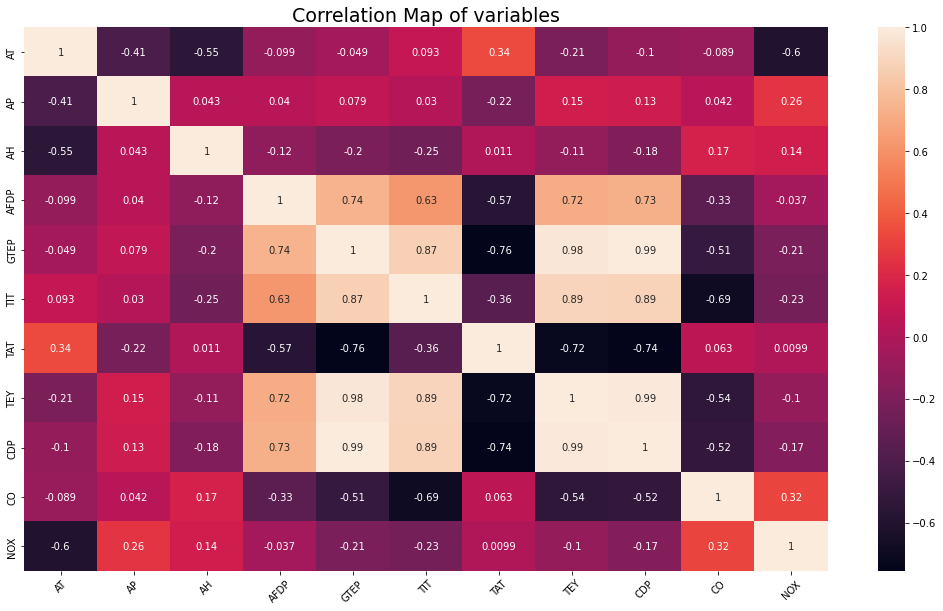

In [ ]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

In [ ]:
!pip install ppscore

In [ ]:
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
84,TEY,TEY,1.000000,predict_itself,True,None,0.000000,1.000000,None
95,CDP,TEY,0.872285,regression,True,mean absolute error,11.172076,1.426840,DecisionTreeRegressor()
51,GTEP,TEY,0.832336,regression,True,mean absolute error,11.172076,1.873154,DecisionTreeRegressor()
62,TIT,TEY,0.766040,regression,True,mean absolute error,11.172076,2.613821,DecisionTreeRegressor()
73,TAT,TEY,0.226050,regression,True,mean absolute error,11.172076,8.646631,DecisionTreeRegressor()
40,AFDP,TEY,0.152509,regression,True,mean absolute error,11.172076,9.468234,DecisionTreeRegressor()
106,CO,TEY,0.055869,regression,True,mean absolute error,11.172076,10.547906,DecisionTreeRegressor()
7,AT,TEY,0.000000,regression,True,mean absolute error,11.172076,16.007470,DecisionTreeRegressor()
18,AP,TEY,0.000000,regression,True,mean absolute error,11.172076,12.475617,DecisionTreeRegressor()
29,AH,TEY,0.000000,regression,True,mean absolute error,11.172076,16.950976,DecisionTreeRegressor()


Text(0.5, 1.01, 'PPScore of each feature with Target variable')

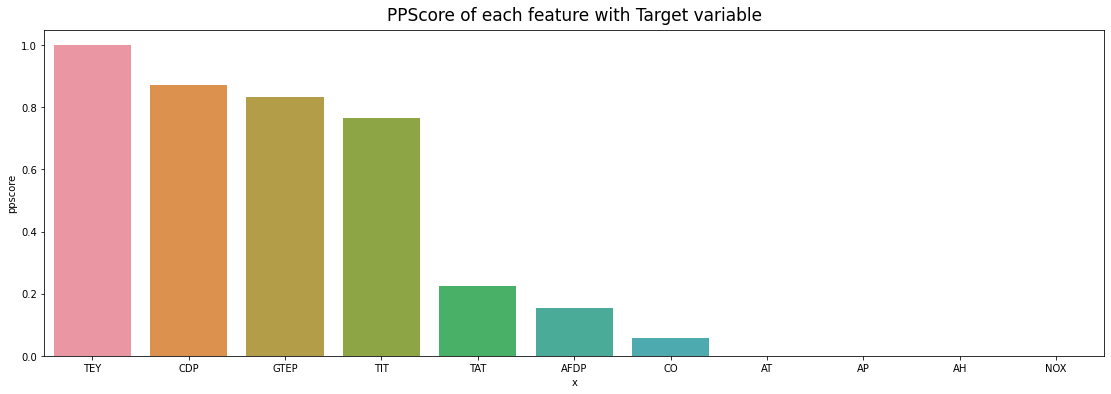

In [ ]:
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='x', y='ppscore', data=score_s.sort_values(by='ppscore', ascending=False))
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

**Observation:**
- From correlation matrix as well as ppscore we can clearly see that TEY is highly dependent on 'CDP', 'GTEP', 'TIT'.
- We can drop 'AT', 'AP', 'AH', 'NOX' as they have very less impact on dependent variables.

**Check for outliers**

In [2]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:11])
outliers = data1[data1['anamoly']==-1]

In [3]:
outliers

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,anamoly
261,5.66020,1018.30,86.968,3.8404,21.079,1028.5,523.86,112.02,10.963,43.4280,99.237,-1
553,3.55320,1027.30,90.871,4.2162,21.464,1041.2,531.68,117.76,10.984,8.8254,106.840,-1
763,1.81300,1007.20,74.980,3.6967,19.958,1026.4,528.18,111.72,10.553,12.0900,114.940,-1
764,1.49880,1006.30,76.734,3.7063,20.041,1027.6,528.79,112.28,10.585,11.6520,112.830,-1
765,0.97877,1005.70,78.978,3.7379,20.084,1027.9,528.52,112.71,10.628,11.6910,108.880,-1
993,4.36570,1021.60,85.528,3.9574,20.263,1025.6,525.72,111.35,10.652,12.7860,112.270,-1
6896,17.13200,1010.80,80.503,2.2148,18.484,1034.1,539.98,102.07,10.182,11.5150,110.760,-1
7019,7.02760,997.23,97.761,2.0992,19.227,1037.2,538.53,109.63,10.338,11.0440,105.060,-1
7470,7.04730,1019.60,96.885,2.4558,19.501,1032.0,532.32,109.21,10.567,11.3740,112.230,-1
9920,15.17900,1017.60,71.630,2.7816,18.435,1027.8,533.45,103.64,10.143,12.1440,113.800,-1


- These are the outliers in our data.

**Data Preprocessing**

In [4]:
df.shape

(15039, 11)

In [5]:
#drop the outliers
df = df.drop(outliers.index)
df.shape

(15023, 11)

In [6]:
#reset index after dropping outliers
df = df.reset_index()
df = df.drop('index', axis = 1)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15018,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15019,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15020,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15021,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [7]:
df = df.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)

In [8]:
df.shape

(15023, 7)

**Converting independent features into normalised and standardized data**

In [9]:
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(df), columns=df.columns)            #data between -3 to +3
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)            #data between -1 to +1

**Take a smaller sample to build a model**

In [10]:
#we will take a small model as this is large data and will take huge amount of time to build model
#to reandomly shuffle and select a % of data
temp = df_std.sample(frac=1)          #shuffle all the data
temp_s = df_std.sample(frac=0.1)      #shuffle and select only 10% of the data randomly to train

In [11]:
temp_s

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
4236,0.094824,0.207306,0.556420,0.546069,0.033790,0.003612,-0.318267
9990,0.456128,1.473222,0.976474,-1.497751,1.414133,1.430319,-0.279678
2322,0.309764,-1.256373,-1.519499,0.604683,-1.429387,-1.402233,0.724091
13062,-0.080628,0.160802,0.586859,0.633989,-0.028177,0.145104,-0.279958
7003,-2.461941,-1.479304,-1.890851,0.584296,-1.594421,-1.610843,1.086162
...,...,...,...,...,...,...,...
7975,-0.625808,-0.471078,0.045050,0.553715,-0.034500,-0.155112,-0.649257
3478,0.072185,0.151213,0.544245,0.567731,-0.088247,0.110638,-0.325817
13094,-1.281156,-1.313424,-1.501236,0.591941,-1.481237,-1.350535,0.497593
3347,-0.143412,-0.122298,0.239858,0.589392,-0.083189,-0.107948,-0.066043


**Splitting data into target variable and independent variables**

In [12]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

,AFDP,GTEP,TIT,TAT,CDP,CO
4236,0.094824,0.207306,0.556420,0.546069,0.003612,-0.318267
9990,0.456128,1.473222,0.976474,-1.497751,1.430319,-0.279678
2322,0.309764,-1.256373,-1.519499,0.604683,-1.402233,0.724091
13062,-0.080628,0.160802,0.586859,0.633989,0.145104,-0.279958
7003,-2.461941,-1.479304,-1.890851,0.584296,-1.610843,1.086162
...,...,...,...,...,...,...
7975,-0.625808,-0.471078,0.045050,0.553715,-0.155112,-0.649257
3478,0.072185,0.151213,0.544245,0.567731,0.110638,-0.325817
13094,-1.281156,-1.313424,-1.501236,0.591941,-1.350535,0.497593
3347,-0.143412,-0.122298,0.239858,0.589392,-0.107948,-0.066043


**Creating train and test data for model validation**

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1126, 6), (376, 6), (1126,), (376,))

**Build a Model**

In [15]:
# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')               #to use GPU for faster processing of model

[]

In [16]:
# create model with 2 hidden layers
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model


In [17]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [18]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model


In [19]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


In [20]:
%%time
epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of this model:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________
CPU times: user

In [21]:
print("Predicted values:")
model2.predict(x_test[:10])

Predicted values:


array([[ 1.4603838 ],
       [ 0.0096969 ],
       [ 0.06686881],
       [-0.0239974 ],
       [-1.4818871 ],
       [ 1.8722074 ],
       [ 0.0253309 ],
       [-0.01755407],
       [-1.0034431 ],
       [-0.01772463]], dtype=float32)

In [22]:
print('Actual values')
y_test[:10]

Actual values


1695     1.558933
4364    -0.004782
10877    0.170370
9440    -0.030074
1592    -1.486295
7170     1.912397
4728     0.036319
2112    -0.030707
3898    -0.946298
10948    0.047068
Name: TEY, dtype: float64

In [25]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

36/36 [==============================] - 0s 3ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0526 - mape: 97.4481

 Results for model 2: 
 Training Loss: 0.005180281586945057 
 Training Mean Absolute Error: 0.005180281586945057 
 Training Mean Squared Error: 0.05262265354394913


In [26]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)

12/12 [==============================] - 0s 2ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0589 - mape: 115.0044

 Results for model 2: 
 Test Loss: 0.005892517510801554 
 Test Mean Absolute Error: 0.005892517510801554 
 Test Mean Squared Error: 0.05892687663435936


**Observations:**

- We got pretty good results for this model.
- Train and test errors are also quiet similar, which means our model is not overfitted or underfitted. 
- Still we will try to get best results by doing hyperparameter tuning. 

**Hyperparameter Tuning to get best options for:** 
- batchsize
- epochs
- neurons
- learning rate
- dropout
- kernel initializer
- activation function

In [27]:
# Create the model
#get best value for batch size and epochs by hyperparameter tuning
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)
# Define the grid search parameters
batch_size = [30,50,70]
epochs = [300,500,800]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=30, epochs=300...................................
[CV 1/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.007 total time=  14.8s
[CV 2/5; 1/9] START batch_size=30, epochs=300...................................
[CV 2/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.007 total time=  16.4s
[CV 3/5; 1/9] START batch_size=30, epochs=300...................................
[CV 3/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.017 total time=  21.4s
[CV 4/5; 1/9] START batch_size=30, epochs=300...................................
[CV 4/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.042 total time=  17.2s
[CV 5/5; 1/9] START batch_size=30, epochs=300...................................
[CV 5/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.011 total time=  24.1s
[CV 1/5; 2/9] START batch_size=30, epochs=500...................................
[CV 1/5; 2/9] END ...batch_size=30, epochs=500;, 

In [28]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0075393722392618654, using {'batch_size': 70, 'epochs': 300}
-0.016978778317570685,0.013234811332822475 with: {'batch_size': 30, 'epochs': 300}
-0.010405903775244951,0.006226308937440076 with: {'batch_size': 30, 'epochs': 500}
-0.012068143114447594,0.006350046434131595 with: {'batch_size': 30, 'epochs': 800}
-0.014911985024809837,0.005297752932001893 with: {'batch_size': 50, 'epochs': 300}
-0.009465495962649584,0.002510776754568933 with: {'batch_size': 50, 'epochs': 500}
-0.011701966542750597,0.0051470257211605605 with: {'batch_size': 50, 'epochs': 800}
-0.0075393722392618654,0.0009991713483655203 with: {'batch_size': 70, 'epochs': 300}
-0.010204726736992598,0.005419346956061117 with: {'batch_size': 70, 'epochs': 500}
-0.016363509744405747,0.014805524624212349 with: {'batch_size': 70, 'epochs': 800}


In [31]:
#get best value for learning rate and dropuout by hyperparameter tuning

# Defining the model
%%time
def create_model_three_hidden_layers(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse', optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

CPU times: user 8min 41s, sys: 27.8 s, total: 9min 9s
Wall time: 7min 20s


In [32]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0074284222908318044, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.0074284222908318044,0.0012566427059348705 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.008746050018817186,0.002546793388744793 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.5391489624977112,0.38128600689168873 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.008981297537684441,0.0017753620043791116 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.018664213083684444,0.007073876261163493 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.857705608010292,0.36597175007040206 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.013176053576171399,0.0034455643774916945 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.02149874735623598,0.009798939491706949 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.9216348528862,0.14326295207399667 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [35]:
# Defining the model
#get best value for kernel initializer and activation func by hyperparameter tuning
%%time
def create_model_three_hidden_layers(activation_function,init):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = init,activation = activation_function))

    model.add(Dense(32,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(64,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(128,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(1))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)


CPU times: user 11min 32s, sys: 37.1 s, total: 12min 9s
Wall time: 12min 7s


In [36]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0071579206734895704, using {'activation_function': 'relu', 'init': 'uniform'}
-1.0118964791297913,0.06708980991351385 with: {'activation_function': 'softmax', 'init': 'uniform'}
-0.022299112752079964,0.0037154822374961373 with: {'activation_function': 'softmax', 'init': 'normal'}
-1.0119526624679565,0.06694821486159644 with: {'activation_function': 'softmax', 'init': 'zero'}
-0.0071579206734895704,0.002275348804491385 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.007379146758466959,0.001621315310551405 with: {'activation_function': 'relu', 'init': 'normal'}
-1.0119281530380249,0.06688031419360685 with: {'activation_function': 'relu', 'init': 'zero'}
-0.012599235028028488,0.001859812763351644 with: {'activation_function': 'tanh', 'init': 'uniform'}
-0.012365044839680196,0.0014994406624064581 with: {'activation_function': 'tanh', 'init': 'normal'}
-1.0120076894760133,0.06688229711387285 with: {'activation_function': 'tanh', 'init': 'zero'}
-0.013341516815125942,0.

In [37]:
# Defining the model
#get best value for neuron by hyperparameter tuning
%%time
def create_model_three_hidden_layers(neuron1,neuron2,neuron3,neuron4):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron3,input_dim = neuron2,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron4,input_dim = neuron3,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters

neuron1 = [8,16,32]
neuron2 = [32,64,128]
neuron3 = [32,64,128]
neuron4 = [32,64,128]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2, neuron3 = neuron3, neuron4 = neuron4)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

CPU times: user 1h 11min 40s, sys: 4min 2s, total: 1h 15min 43s
Wall time: 1h 8min 29s


In [38]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.006522623915225267, using {'neuron1': 32, 'neuron2': 64, 'neuron3': 64, 'neuron4': 128}
-0.009027735143899918,0.0016703966760312206 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 32}
-0.008026432525366545,0.0018345186393841056 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 64}
-0.008605633024126291,0.002530353920742668 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 128}
-0.009371494874358177,0.0027848141855597005 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 32}
-0.00853779846802354,0.0019763297892534592 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 64}
-0.008496165927499532,0.0036394701096190774 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 128}
-0.00807237820699811,0.001793167837743366 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 32}
-0.008483995590358973,0.0014214088260315577 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 64}
-0.008200791478157044,

In [43]:
#create a model with 3 hidden layers with best hyperparameters
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [44]:
%%time
epochs=300
batch_size=70

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of our final model:
Model: "sequential_656"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2911 (Dense)          (None, 8)                 56        
                                                                 
 dense_2912 (Dense)          (None, 128)               1152      
                                                                 
 dense_2913 (Dense)          (None, 64)                8256      
                                                                 
 dense_2914 (Dense)          (None, 128)               8320      
                                                                 
 dense_2915 (Dense)          (None, 1)                 129       
                                                                 
Total params: 17,913
Trainable params: 17,913
Non-trainable params: 0
_________________________________________________________________
CPU time

In [45]:
loss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

36/36 [==============================] - 0s 2ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0655 - mape: 238.7752

 Results for final model : 
 Training Loss: 0.007562562823295593 
 Training Mean Absolute Error: 0.007562562823295593 
 Training Mean Squared Error: 0.06554283946752548


In [47]:
loss_t, mae_t, mse_t, mape_t = final_model.evaluate(x_test, y_test)
print('\n', "Results for final model :", '\n', "Test Loss:", loss_t, '\n', "Test Mean Absolute Error:" , mae_t, '\n', "Test Mean Squared Error:", mse_t)

12/12 [==============================] - 0s 3ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0718 - mape: 214.4739

 Results for final model : 
 Test Loss: 0.009072024375200272 
 Test Mean Absolute Error: 0.009072024375200272 
 Test Mean Squared Error: 0.07183393836021423


**Predicting values from Model using same dataset**

In [51]:
# generating predictions for test data
y_predict_test = model.predict(x_test) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

(376, 8)


,AFDP,GTEP,TIT,TAT,CDP,CO,Actual,Predicted
1695,2.391899,1.460277,0.976474,-1.483735,1.375899,-0.718032,1.558933,1.422794
4364,0.364782,0.303909,0.739052,0.577925,0.229455,0.288897,-0.004782,-0.003155
10877,-0.413238,0.213538,0.732965,0.604683,0.143290,-0.780524,0.170370,0.002438
9440,0.471133,-0.099285,0.325086,0.565183,-0.032667,-0.432448,-0.030074,-0.028161
1592,0.314239,-1.434239,-1.787360,0.584296,-1.576377,0.617133,-1.486295,-1.546750
7170,-0.552495,1.856760,0.976474,-2.173078,1.758652,-0.713977,1.912397,1.868405
4728,0.364650,0.275863,0.714701,0.603409,0.207687,-0.813618,0.036319,0.055277
2112,0.969060,-0.040556,0.318998,0.562634,-0.050807,-0.195557,-0.030707,-0.032214
3898,-0.631468,-0.821057,-0.855936,0.580473,-0.893408,1.196941,-0.946298,-1.017600
10948,-0.480892,0.115017,0.483367,0.616151,0.031729,-0.567713,0.047068,-0.071619


**Visualizing the Relationship between the Actual and Predicted Values Model Validation**

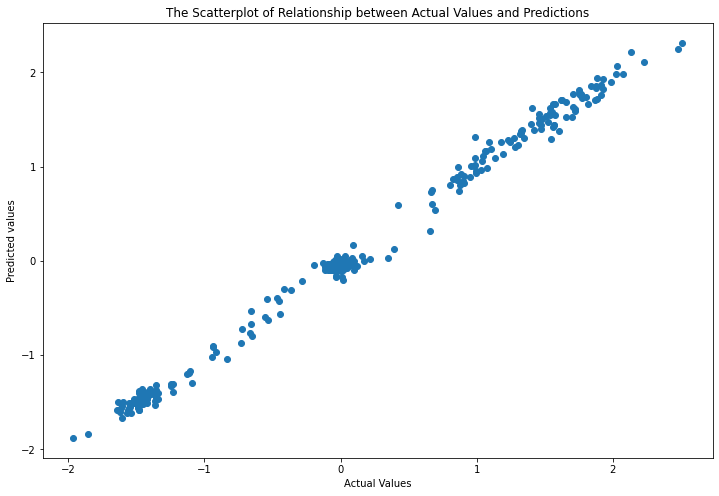

In [52]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])